# <span style="color: blue;">ให้กรอกรหัสนิสิต และชื่อ-นามสกุลของสมาชิกในทีม</span>
# <span style="color: blue;">(ห้ามมีสมาชิกเกิน 2 คน)</span>
## รหัสนิสิต ชื่อ-นามสกุล

## Backpropagation Exercise
In this exercise we will use backpropagation to train a multi-layer perceptron (with a single hidden layer).  We will experiment with different patterns and see how quickly or slowly the weights converge.  We will see the impact and interplay of different parameters such as learning rate, number of iterations, and number of data points.

In [124]:
#Preliminaries
from __future__ import division, print_function
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Fill out the code below so that it creates a multi-layer perceptron with a single hidden layer (with 4 nodes) and trains it via back-propagation.  Specifically your code should:

1. Initialize the weights to random values between -1 and 1
1. Perform the feed-forward computation
1. Compute the loss function
1. Calculate the gradients for all the weights via back-propagation
1. Update the weight matrices (using a learning_rate parameter)
1. Execute steps 2-5 for a fixed number of iterations
1. Plot the accuracies and log loss and observe how they change over time


Once your code is running, try it for the different patterns below.

- Which patterns was the neural network able to learn quickly and which took longer?
- What learning rates and numbers of iterations worked well?
- If you have time, try varying the size of the hidden layer and experiment with different activation functions (e.g. ReLu)

shape of x_mat_full is (4000, 3)
shape of y is (4000,)


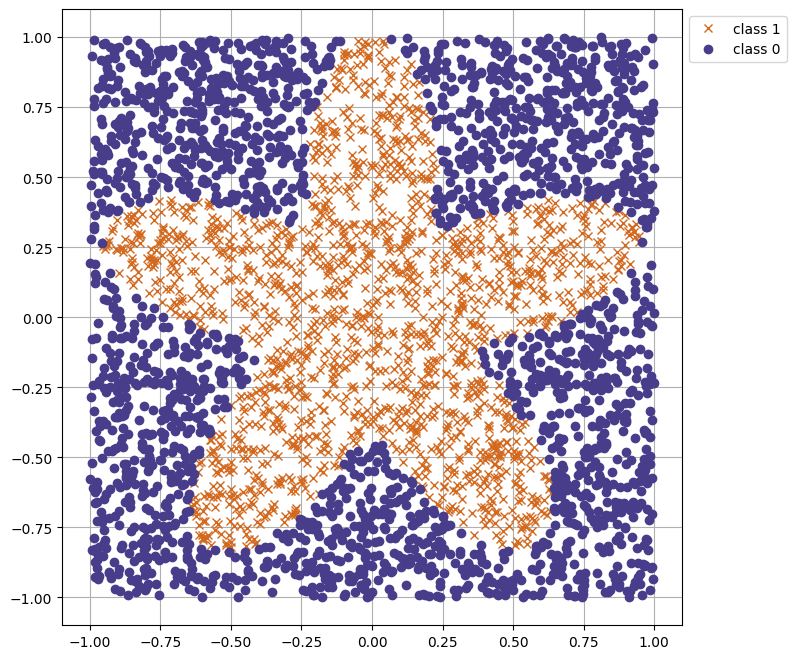

In [125]:
## This code below generates two x values and a y value according to different patterns
## It also creates a "bias" term (a vector of 1s)
## The goal is then to learn the mapping from x to y using a neural network via back-propagation

np.random.seed(12345)

num_obs = 4000
x_mat_1 = np.random.uniform(-1, 1, size=(num_obs, 2))
x_mat_bias = np.ones((num_obs, 1))
x_mat_full = np.concatenate((x_mat_1, x_mat_bias), axis=1)

# 5-petal flower shape
r = np.sqrt(x_mat_full[:, 0] ** 2 + x_mat_full[:, 1] ** 2)
theta = np.arctan2(x_mat_full[:, 1], x_mat_full[:, 0])
y = (r < (0.7 + 0.3 * np.sin(5 * theta))).astype(int)

print('shape of x_mat_full is {}'.format(x_mat_full.shape))
print('shape of y is {}'.format(y.shape))

fig,  ax = plt.subplots(figsize=(8, 8))
ax.plot(x_mat_full[y==1, 0], x_mat_full[y==1, 1], 'x', label='class 1', color='chocolate')
ax.plot(x_mat_full[y==0, 0], x_mat_full[y==0, 1], 'o', label='class 0', color='darkslateblue')
ax.grid(True)
ax.legend(loc='best', bbox_to_anchor=(1, 1))

Here are some helper functions

In [126]:
def sigmoid(x):
    """
    Sigmoid function
    """
    return 1.0 / (1.0 + np.exp(-x))

def loss_fn(y_true, y_pred, eps=1e-16):
    """
    Loss function we would like to optimize (minimize)
    We are using Logarithmic Loss
    http://scikit-learn.org/stable/modules/model_evaluation.html#log-loss
    """
    y_pred = np.maximum(y_pred, eps)
    y_pred = np.minimum(y_pred, (1-eps))
    return -(np.sum(y_true*np.log(y_pred)) + np.sum((1-y_true)*np.log(1-y_pred)))/len(y_true)

def forward_pass(W_1, W_2, x_mat, y):
    """
    Does a forward computation of the neural network
    Takes the input `x_mat` and produces the output `y_pred`
    Also produces the gradient of the log loss function
    """
    # First,  compute the new predictions `y_pred`
    z_2 = np.dot(x_mat, W_1)
    a_2 = sigmoid(z_2)
    z_3 = np.dot(a_2, W_2)
    y_pred = sigmoid(z_3).reshape((len(x_mat), ))
    # Now compute the gradient
    J_z_3_grad = y_pred - y
    J_W_2_grad = np.dot(J_z_3_grad, a_2).reshape(-1, 1)
    a_2_z_2_grad = sigmoid(z_2)*(1-sigmoid(z_2))
    J_W_1_grad = (np.dot((J_z_3_grad).reshape(-1, 1), W_2.reshape(-1, 1).T)*a_2_z_2_grad).T.dot(x_mat).T
    gradient = (J_W_1_grad, J_W_2_grad)
    
    return y_pred, gradient

def plot_loss_accuracy(loss_vals, accuracies):
    fig = plt.figure(figsize=(16, 7))
    fig.suptitle('Log Loss and Accuracy over iterations')
    
    epochs = np.arange(1, len(loss_vals) + 1)
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(epochs, loss_vals)
    ax.grid(True)
    ax.set(xlabel='epochs', title='Log Loss')
    ax.set_xticks([1] + list(ax.get_xticks()[ax.get_xticks() > 1]))
    
    ax = fig.add_subplot(1, 2, 2)
    ax.plot(epochs, accuracies)
    ax.grid(True)
    ax.set(xlabel='epochs', title='Accuracy')
    ax.set_xticks([1] + list(ax.get_xticks()[ax.get_xticks() > 1]))

## <span style="color: green;">1. ปรับเพิ่มโค้ดใน Cell ด้านล่างเพื่อให้โมเดลเรียนรู้จากข้อมูลและแสดงให้เห็นว่าโมเดลให้ค่า accuracy ไม่น้อยกว่า 70%</span>

Epoch 200: loss = 0.4534, accuracy = 0.7572
Epoch 400: loss = 0.4354, accuracy = 0.7582
Epoch 600: loss = 0.4331, accuracy = 0.7572
Epoch 800: loss = 0.4306, accuracy = 0.7572
Epoch 1000: loss = 0.4281, accuracy = 0.7600


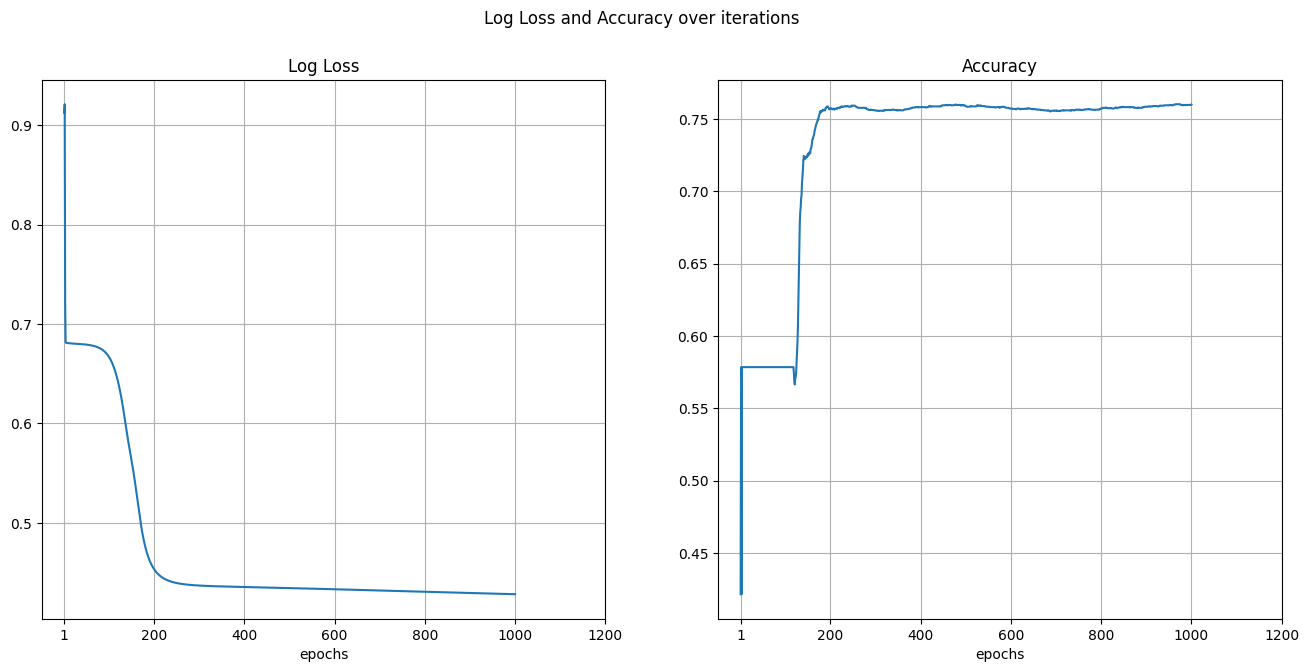

In [127]:
#### Initialize the network parameters
np.random.seed(12345)

W_1 = np.random.uniform(-1, 1, (x_mat_full.shape[-1], 3))
W_2 = np.random.uniform(-1, 1, (3, 1))
num_epochs = 1000
learning_rate = 0.002
x_mat = x_mat_full

loss_vals, accuracies = [], []
for i in range(1, num_epochs+1):
    ### Do a forward computation, and get the gradient
    y_pred, gradient = forward_pass(W_1, W_2, x_mat, y)
    ## Update the weight matrices
    W_1 -= learning_rate * gradient[0]
    W_2 -= learning_rate * gradient[1]
    ### Compute the loss and accuracy
    loss = loss_fn(y, y_pred)
    accuracy = np.mean((y_pred > 0.5).astype(int) == y)
    loss_vals.append(loss)
    accuracies.append(accuracy)
    ## Print the loss and accuracy for every 200th iteration
    if not i % 200:
        print('Epoch {}: loss = {:.4f}, accuracy = {:.4f}'.format(i, loss, accuracy))

plot_loss_accuracy(loss_vals, accuracies)


In [128]:
y_pred, _ = forward_pass(W_1, W_2, x_mat, y)
y_pred = (y_pred > 0.5).astype(int)
accuracy = np.mean(y_pred == y)

print('Final Accuracy = {:.4f}'.format(accuracy))

Final Accuracy = 0.7600


## <span style="color: green;">2. ปรับโครงสร้างโมเดลและค่า hyperparameter ที่เห็นสมควร พร้อมอธิบายสิ่งที่ได้ปรับและเหตุผล เพื่อให้โมเดลมีประสิทธิภาพที่ให้ค่า accuracy ไม่น้อยกว่า 95%</span>

Epoch 200: loss = 0.4044, accuracy = 0.7977
Epoch 400: loss = 0.3403, accuracy = 0.8283
Epoch 600: loss = 0.2904, accuracy = 0.8642
Epoch 800: loss = 0.2490, accuracy = 0.8925
Epoch 1000: loss = 0.2197, accuracy = 0.9107
Epoch 1200: loss = 0.1992, accuracy = 0.9223
Epoch 1400: loss = 0.1841, accuracy = 0.9320
Epoch 1600: loss = 0.1725, accuracy = 0.9357
Epoch 1800: loss = 0.1630, accuracy = 0.9390
Epoch 2000: loss = 0.1554, accuracy = 0.9393
Epoch 2200: loss = 0.1493, accuracy = 0.9413
Epoch 2400: loss = 0.1443, accuracy = 0.9433
Epoch 2600: loss = 0.1400, accuracy = 0.9453
Epoch 2800: loss = 0.1360, accuracy = 0.9470
Epoch 3000: loss = 0.1321, accuracy = 0.9493
Epoch 3200: loss = 0.1283, accuracy = 0.9507
Epoch 3400: loss = 0.1241, accuracy = 0.9533
Epoch 3600: loss = 0.1198, accuracy = 0.9553
Epoch 3800: loss = 0.1159, accuracy = 0.9565
Epoch 4000: loss = 0.1123, accuracy = 0.9577
Epoch 4200: loss = 0.1090, accuracy = 0.9583
Epoch 4400: loss = 0.1061, accuracy = 0.9605
Epoch 4600: lo

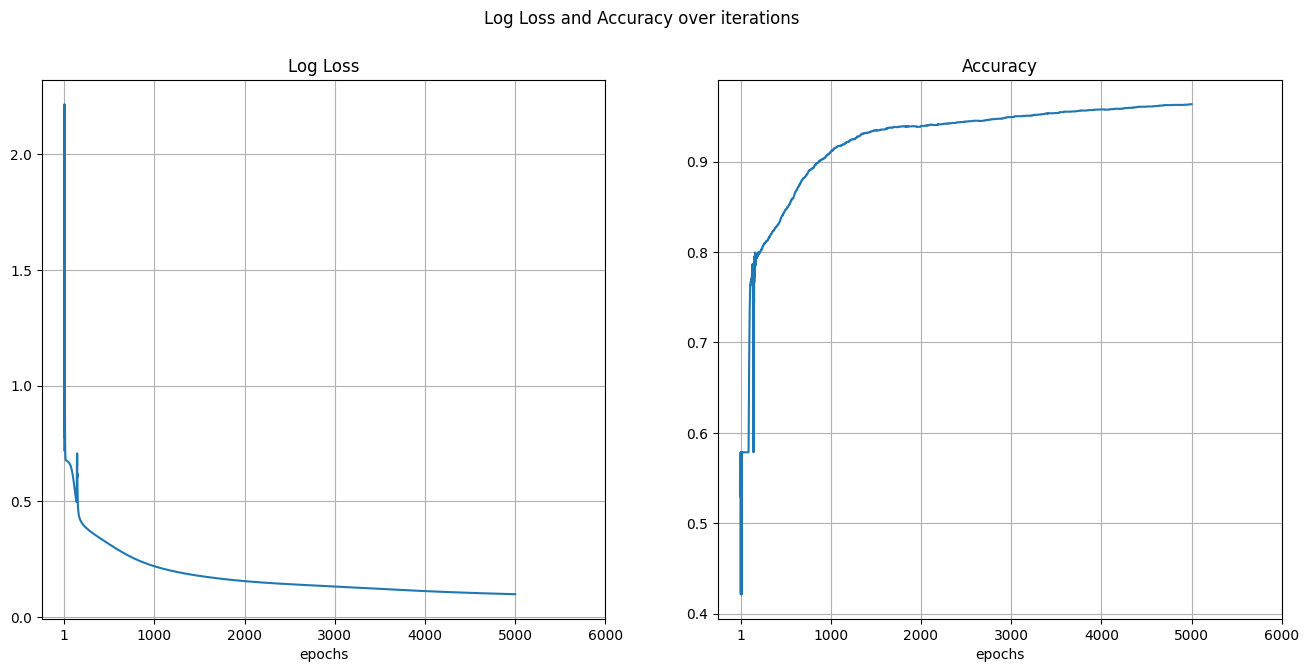

In [129]:
#### Initialize the network parameters
np.random.seed(12345)

W2_1 = np.random.uniform(-1, 1, (x_mat_full.shape[-1], 16))
W2_2 = np.random.uniform(-1, 1, (16, 1))
num_epochs2 = 5000
learning_rate2 = 0.001
x_mat2 = x_mat_full

loss_vals2, accuracies2 = [], []
for i in range(1, num_epochs2+1):
    ### Do a forward computation, and get the gradient
    y_pred, gradient = forward_pass(W2_1, W2_2, x_mat2, y)
    ## Update the weight matrices
    W2_1 -= learning_rate2 * gradient[0]
    W2_2 -= learning_rate2 * gradient[1]
    ### Compute the loss and accuracy
    loss = loss_fn(y, y_pred)
    accuracy = np.mean((y_pred > 0.5).astype(int) == y)
    loss_vals2.append(loss)
    accuracies2.append(accuracy)
    ## Print the loss and accuracy for every 200th iteration
    if not i % 200:
        print('Epoch {}: loss = {:.4f}, accuracy = {:.4f}'.format(i, loss, accuracy))
plot_loss_accuracy(loss_vals2, accuracies2)

In [130]:
y_pred2, _ = forward_pass(W2_1, W2_2, x_mat2, y)
y_pred2 = (y_pred2 > 0.5).astype(int)
accuracy2 = np.mean(y_pred2 == y)

print('Final Accuracy = {:.4f}'.format(accuracy2))

Final Accuracy = 0.9635


<span style="color: blue">สิ่งที่เปลี่ยน</span>

<span style="color: blue">1.เพิ่มจำนวน neuron จาก 3 เป็น 16 ใน hidden layer เพื่อเพิ่มสามารถในเรียนรู้กับข้อมูลที่ซับซ้อนได้ดีขึ้น</span>

<span style="color: blue">2.ลด learning rate จาก 0.002 เป็น 0.001 เนื่องจากโมเดลมีโครงสร้างที่ซับซ้อนขึ้น การใช้ learning rate เดิมอาจทำให้การ update weight เป็นไปอย่างไม่เสถียร</span>

<span style="color: blue">3.เพิ่มจำนวน epoch จาก 500 เป็น 5000 เนื่องจาก learning rate มีค่าลดลง การใช้จำนวน epoch เท่าเดิมในขณะที่ learning rate ลดลงอาจทำให้ weight ยังไม่ลู่เข้าสู่ค่าที่เหมาะสม</span>

## <span style="color: green;">3. ให้วาดกราฟของคลาส Positive และ Negative ที่ทำนายถูกและไม่ถูก และให้แสดง Confustion Matrix ดังตัวอย่างในรูป และให้เขียนอธิบายสิ่งที่สังเกตได้จากกราฟทั้งสอง</span>
![](https://drive.google.com/thumbnail?id=156xTSDBMlhHJBlVnBG2KvOeUt-reneE0&sz=w642)
![](https://drive.google.com/thumbnail?id=16lVXq3JWbGlw_QRx1_YWBQvMXL0DdsjH&sz=w482)

In [131]:
y_bin = (y_pred2 > 0.5).astype(int)

TP = (y == 1) & (y_bin == 1)
TN = (y == 0) & (y_bin == 0)
FP = (y == 0) & (y_bin == 1)
FN = (y == 1) & (y_bin == 0)

conf_matrix = np.array([[np.sum(TN), np.sum(FP)],
                        [np.sum(FN), np.sum(TP)]])

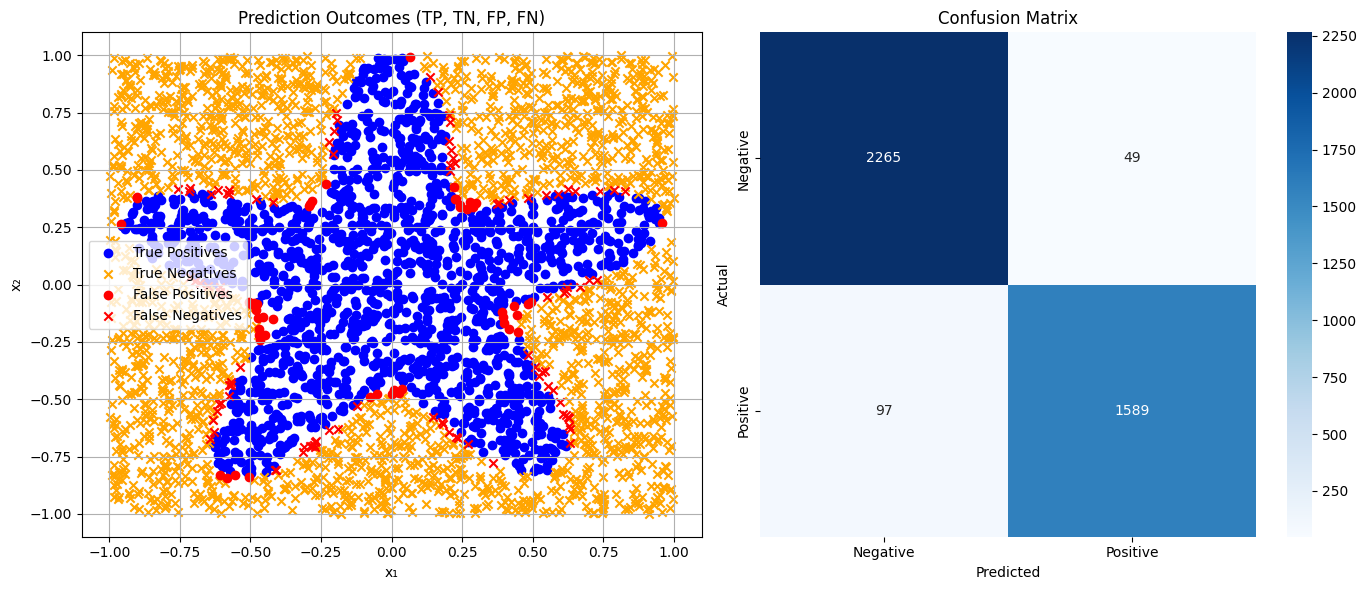

In [135]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].scatter(x_mat2[TP, 0], x_mat2[TP, 1], c='blue', marker='o', label='True Positives')
axes[0].scatter(x_mat2[TN, 0], x_mat2[TN, 1], c='orange', marker='x', label='True Negatives')
axes[0].scatter(x_mat2[FP, 0], x_mat2[FP, 1], c='red', marker='o', label='False Positives')
axes[0].scatter(x_mat2[FN, 0], x_mat2[FN, 1], c='red', marker='x', label='False Negatives')
axes[0].set_xlabel('x₁')
axes[0].set_ylabel('x₂')
axes[0].set_title('Prediction Outcomes (TP, TN, FP, FN)')
axes[0].legend()
axes[0].grid(True)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', ax=axes[1],
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
axes[1].set_title('Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()

<span style="color: blue">โมเดลสามารถแยกข้อมูลของคลาส 0 และ 1 ได้ดี จำนวนจุดที่ทำนายถูกต้องมีสัดส่วนมากกว่าจุดที่ทำนายผิดผลาดมาก โดยจุดที่ผิดพลาดส่วนมากจะอยู่บริเวณรอยต่อของคลาส 0 และ 1 </span>

## <span style="color: green;">4. ใช้โมเดลที่เทรนได้ค่า accuracy ตามที่โจทย์กำหนด ให้แสดงรายการข้อมูลที่โมเดลทำนายผิดของแต่ละคลาสมาอย่างละ 3 รายการ หรือหากมีจำนวนน้อยกว่า ให้แสดงเท่าที่มี</span>

In [134]:
FP_list = np.where(FP)[0][:3]
FN_list = np.where(FN)[0][:3]

print("Actual 0, Predicted 1:")
for i in FP_list:
    print(f"  Index {i}: x = {x_mat2[i]}")

print("Actual 1, Predicted 0:")
for i in FN_list:
    print(f"  Index {i}: x = {x_mat2[i]}")

Actual 0, Predicted 1:
  Index 98: x = [-0.4756512  -0.08626099  1.        ]
  Index 155: x = [-0.28141719  0.36435461  1.        ]
  Index 457: x = [-0.04973503 -0.47609772  1.        ]
Actual 1, Predicted 0:
  Index 1: x = [-0.63216238 -0.59087944  1.        ]
  Index 52: x = [-0.71410996  0.03165304  1.        ]
  Index 71: x = [-0.27101943 -0.68792282  1.        ]
